# Linear Fast-Reaction System 1

In [1]:
using TUMProject

┌ Info: Precompiling TUMProject [a1819116-bf1f-479c-815f-4d16c84e57aa]
└ @ Base loading.jl:1664


### Define grid and operator

In [2]:
r = 50
n = (2*r + 1)
N = n^2
grid = uniform2dgrid(-r:r,-r:r)
operator = laplace2dpbc(grid)  

Laplace Operator with periodic boundary condtions


### Set up initial condtions

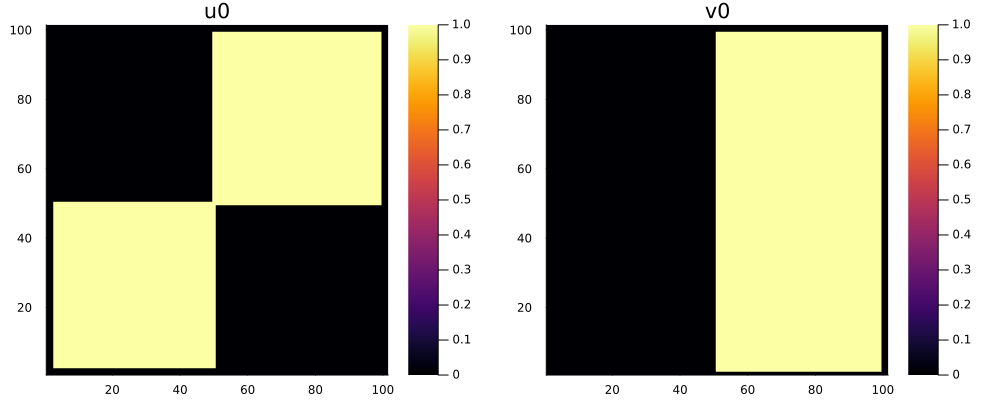

In [3]:
u0 = zeros(Float32, (n,n))
v0 = zeros(Float32, (n,n))
u0[r:2*r-1,r:2*r-1] .= 1f0
u0[3:r,3:r] .= 1f0
v0[2:2*r-1,r+1:2*r-1] .= 1f0
plotinitialconditions(u0, v0, "u0", "v0")

### Define linear fast-reaction system and its limit system

In the first example we choose a linear f and g. The -u in f ensures that the critical manifold is attracting, leading to h(v) = v/2.

In [4]:
f(u,v) = -u + v/2
g(u,v) = 2*u - 3*v 
D_u = 2.5
D_v = 1.4
𝜀  = 0.5
system = fastreactionsystem(operator, f, g, D_u, D_v, 𝜀)
h(v) = v/2 
limitsystem = fastreactionlimitsystem(operator, h, g, 𝜀)

Limit System of Fast-Reaction-System


### Solve the systems and plot solutions

We first integrate the limit system.

In [5]:
using DifferentialEquations
T_max = 5
tspan = (0.0, T_max)
limitprob = ODEProblem(limitsystem, reshape(v0, :) , tspan, N)
limitsol = solve(limitprob)
ulimit(t) = reshape( h.(limitsol(t)), n, n )
vlimit(t) = reshape( limitsol(t), n, n )

vlimit (generic function with 1 method)

┌ Info: Saved animation to /home/pascal/TUMProject.jl/notebooks/linearsystems/linearlimitsystem1.gif
└ @ Plots /home/pascal/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/pascal/TUMProject.jl/notebooks/linearsystems/linearlimitsystem1.gif")
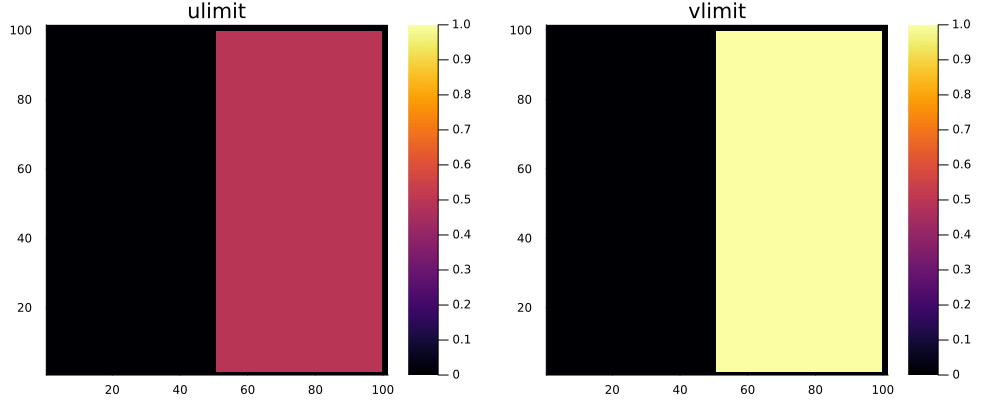

In [6]:
ts = tspan[1]:0.01:tspan[2]
animatesystem( ulimit, vlimit ,"ulimit", "vlimit", ts, [0.0, 1.0], "linearlimitsystem1", 50.0)

u and v almost behave identically since u = v/2 

In [7]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob)
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)

v (generic function with 1 method)

┌ Info: Saved animation to /home/pascal/TUMProject.jl/notebooks/linearsystems/linearsystem1a.gif
└ @ Plots /home/pascal/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/pascal/TUMProject.jl/notebooks/linearsystems/linearsystem1a.gif")
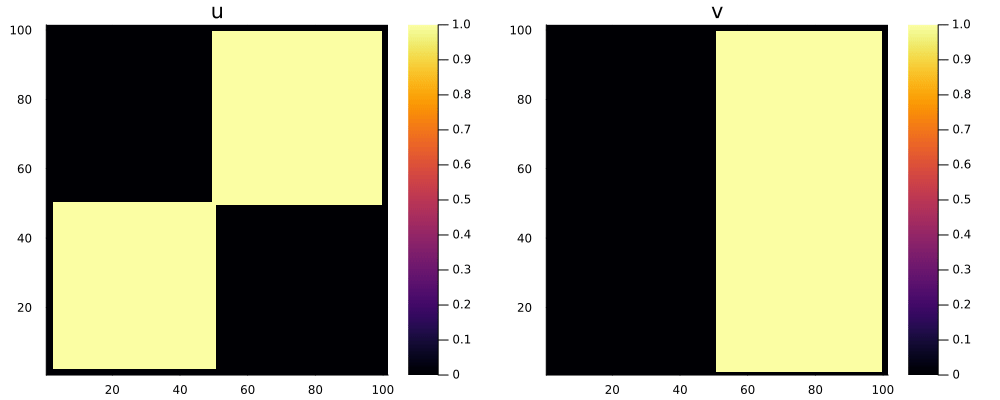

In [8]:
animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "linearsystem1a", 50.0)

### Compare the convergence of the system to its limit in L_2 norm

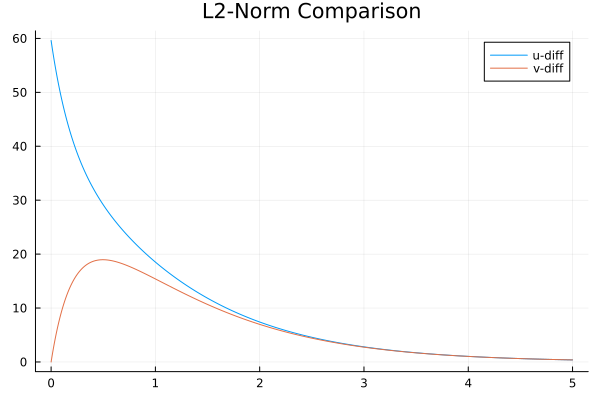

In [9]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

### Decresing Epsilon

In order to compare how a change in epsilon has an influence on the convergence we now take a smaller 𝜀 then before.

In [10]:
𝜀2 = 0.1
system2 = fastreactionsystem(operator, f, g, D_u, D_v, 𝜀2)

Fast-Reaction-System


In [11]:
prob2 = ODEProblem(system2, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol2 = solve(prob2)
u2(t) = reshape( sol2(t)[1:N], n, n)
v2(t) = reshape( sol2(t)[N+1:2N], n, n)

v2 (generic function with 1 method)

┌ Info: Saved animation to /home/pascal/TUMProject.jl/notebooks/linearsystems/linearsystem1b.gif
└ @ Plots /home/pascal/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/pascal/TUMProject.jl/notebooks/linearsystems/linearsystem1b.gif")
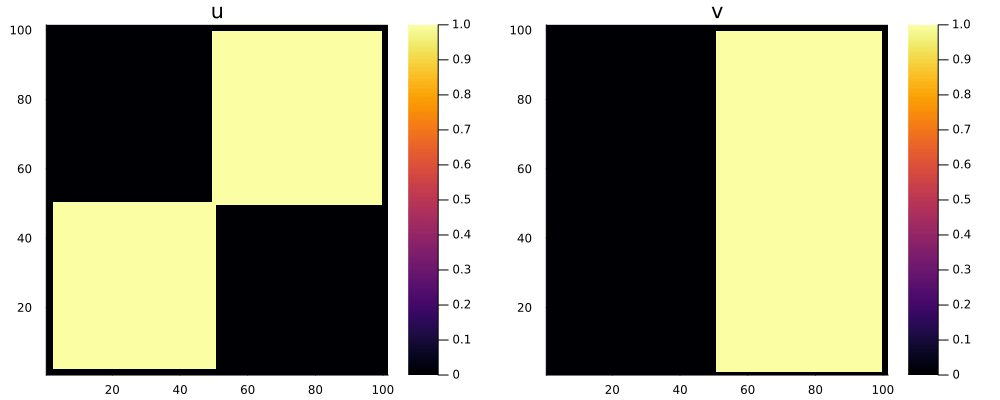

In [12]:
animatesystem( u2, v2 ,"u","v", ts, [0.0, 1.0], "linearsystem1b", 50.0 )

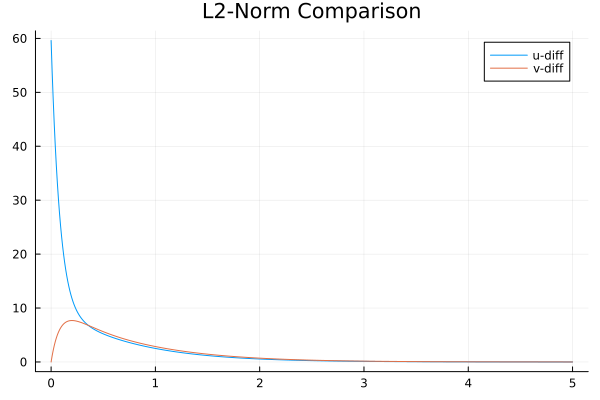

In [13]:
plotcomparenorms(u2, ulimit, v2, vlimit, 2.0, ts, "u-diff", "v-diff")